In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Youssef\Desktop\jyptar1\Financial-Fraud-Detection\PS_20174392719_1491204439457_log.csv")
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.duplicated().sum()

0

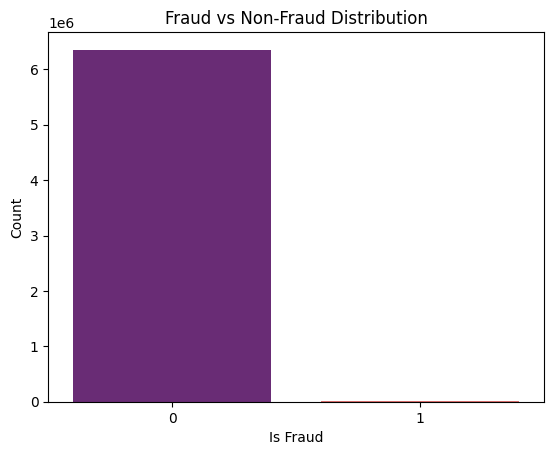

In [7]:
sns.countplot(data=df, x='isFraud', palette='magma')
plt.title('Fraud vs Non-Fraud Distribution')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

In [8]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

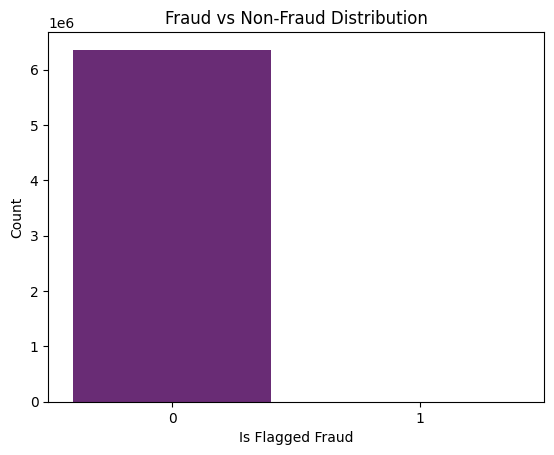

In [9]:
sns.countplot(data=df, x='isFlaggedFraud', palette='magma')
plt.title('Fraud vs Non-Fraud Distribution')
plt.xlabel('Is Flagged Fraud')
plt.ylabel('Count')
plt.show()

In [10]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

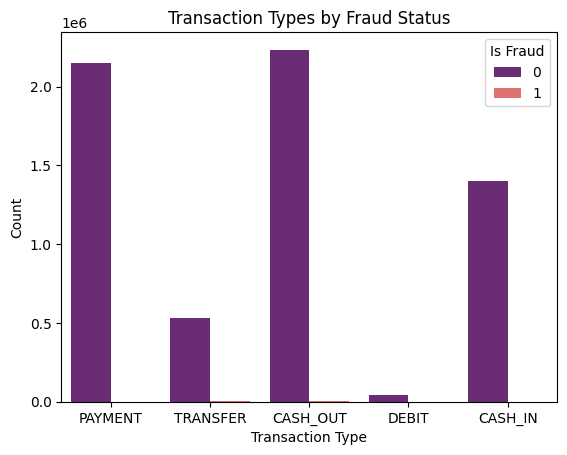

In [11]:
sns.countplot(data=df, x='type', hue='isFraud', palette='magma')
plt.title('Transaction Types by Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Is Fraud', loc='upper right')
plt.show()

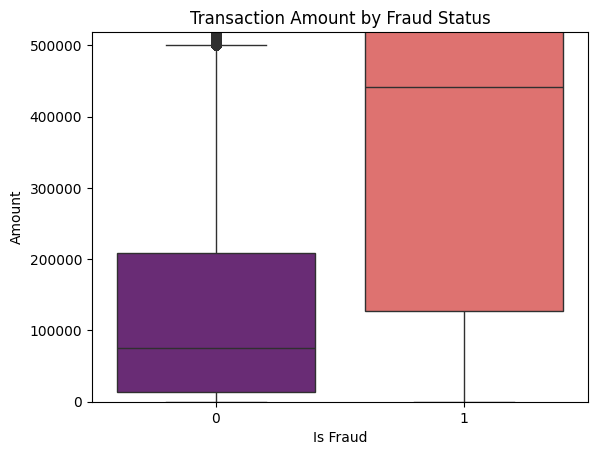

In [12]:
sns.boxplot(data=df, x='isFraud', y='amount', palette='magma')
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.ylim(0, df['amount'].quantile(0.95))
plt.show()

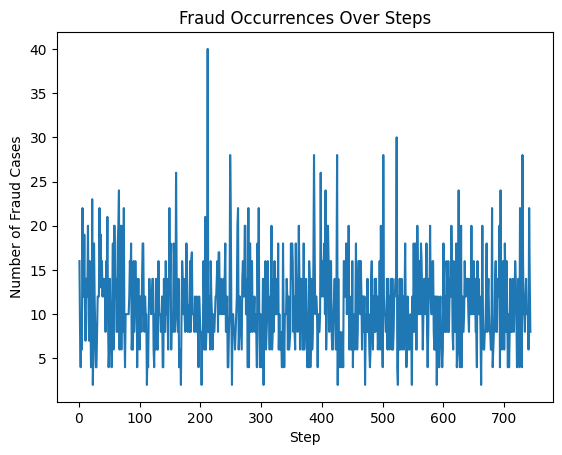

In [13]:
fraud_by_step = df[df['isFraud'] == 1].groupby('step').size()
fraud_by_step.plot(kind='line', title='Fraud Occurrences Over Steps')
plt.xlabel('Step')
plt.ylabel('Number of Fraud Cases')
plt.show()

In [14]:
df['balance_change_org'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balance_change_dest'] = df['oldbalanceDest'] - df['newbalanceDest']

In [15]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_change_org,balance_change_dest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [16]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [17]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [18]:
df.head(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_change_org,balance_change_dest
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,181.00,21182.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,11668.14,0.0


In [19]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'balance_change_org', 'balance_change_dest']
scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [20]:
df.head(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_change_org,balance_change_dest
0,1,PAYMENT,0.000106,0.002855,0.003233,0.000000,0.0,0,0,0.161566,0.890013
1,1,PAYMENT,0.000020,0.000357,0.000391,0.000000,0.0,0,0,0.160897,0.890013
2,1,TRANSFER,0.000002,0.000003,0.000000,0.000000,0.0,1,0,0.160756,0.890013
3,1,CASH_OUT,0.000002,0.000003,0.000000,0.000059,0.0,1,0,0.160756,0.890191
4,1,PAYMENT,0.000126,0.000697,0.000603,0.000000,0.0,0,0,0.161720,0.890013


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [22]:
df.head(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_change_org,balance_change_dest
0,1,3,0.000106,0.002855,0.003233,0.000000,0.0,0,0,0.161566,0.890013
1,1,3,0.000020,0.000357,0.000391,0.000000,0.0,0,0,0.160897,0.890013
2,1,4,0.000002,0.000003,0.000000,0.000000,0.0,1,0,0.160756,0.890013
3,1,1,0.000002,0.000003,0.000000,0.000059,0.0,1,0,0.160756,0.890191
4,1,3,0.000126,0.000697,0.000603,0.000000,0.0,0,0,0.161720,0.890013


## Splitting and Scaling

In [23]:
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # For TensorFlow

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
print(X_train.shape)

(3563067, 9)


In [26]:
model = Sequential(
    [
        Dense(units=256, input_dim=9, activation='relu'),
        Dense(units=128, activation='relu'),
        Dense(units=64, activation='relu'),
        Dense(units=32, activation='relu'),
        Dense(units=1, activation='sigmoid')
    ]
)

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [29]:
history = model.fit(X_train, y_train, 
                    epochs=3, 
                    batch_size=512, 
                    validation_data=(X_test, y_test),
                    callbacks = [early_stopping])

Epoch 1/3
6960/6960 ━━━━━━━━━━━━━━━━━━━━ 45s 6ms/step - accuracy: 0.9987 - loss: 0.0164 - val_accuracy: 0.9987 - val_loss: 0.0093
Epoch 2/3
6960/6960 ━━━━━━━━━━━━━━━━━━━━ 54s 8ms/step - accuracy: 0.9987 - loss: 0.0088 - val_accuracy: 0.9988 - val_loss: 0.0075
Epoch 3/3
6960/6960 ━━━━━━━━━━━━━━━━━━━━ 44s 6ms/step - accuracy: 0.9988 - loss: 0.0081 - val_accuracy: 0.9990 - val_loss: 0.0087


In [30]:
y_pred = model.predict(X_test)

39767/39767 ━━━━━━━━━━━━━━━━━━━━ 71s 2ms/step


In [31]:
y_pred = (y_pred >= 0.5).astype(int)

In [32]:
print(f"Accuracy = {accuracy_score(y_pred, y_test)}")

Accuracy = 0.998840886301555


In [33]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.91      0.11      0.20      1643

    accuracy                           1.00   1272524
   macro avg       0.96      0.56      0.60   1272524
weighted avg       1.00      1.00      1.00   1272524



In [34]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[1270863      18]
 [   1457     186]]
